In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import os
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving DatosConsumoCombustibles.csv to DatosConsumoCombustibles.csv


In [ ]:
file_name=list(data.keys())[0]
file_name

'DatosConsumoCombustibles.csv'

In [ ]:
df=pd.read_csv(file_name)
#display(df)
#df=pd.melt(df,id_vars= 'Mes',value_name='Consumo',var_name='Combustible')

df.set_index(pd.date_range(start='2000-01-01', end='2021-06-01',freq='1M',closed='right'),inplace=True)

df.index.name='Fecha'

df.drop(df.index[-4:],axis=0,inplace=True)
df

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,GasolinaAviacion,Kerosina,TurboJet,Bunker,Asfalto,PetCoke,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-31,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,194410.48,1426.00,64026.09,NaN,296766.99,48446.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
2000-02-29,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,174710.55,1458.00,62660.30,NaN,328116.44,50597.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2000-03-31,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,189234.07,1503.00,61361.99,NaN,368589.63,27593.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
2000-04-30,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,174330.61,1561.00,61814.32,NaN,396300.47,53794.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
2000-05-31,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,191745.15,1642.00,54098.32,NaN,449368.92,60137.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,154,2020,9,610445.10,661665.58,1272110.68,NaN,959013.35,9735.38,968748.73,439581.36,948.80,287.45,20238.47,123261.01,26005.63,158485.71,21879.53,509.00,11629.83,35.69,NaN,95762.0,54.92,NaN,356.40,3139895.21
2020-10-31,164,2020,10,648582.82,680362.07,1328944.89,NaN,1064005.30,16475.25,1080480.55,459312.45,1142.86,266.74,29115.90,117108.19,37876.73,254131.92,22655.15,468.37,12831.92,29.42,NaN,128310.0,68.10,NaN,NaN,3472743.19
2020-11-30,174,2020,11,639856.62,652630.16,1292486.78,NaN,1072873.46,10704.69,1083578.15,421504.59,1142.86,231.18,33878.65,111855.80,28761.42,209982.62,21903.24,407.14,10883.80,66.48,NaN,91526.0,70.08,NaN,933.81,3309212.60


Super

<Figure size 432x288 with 0 Axes>

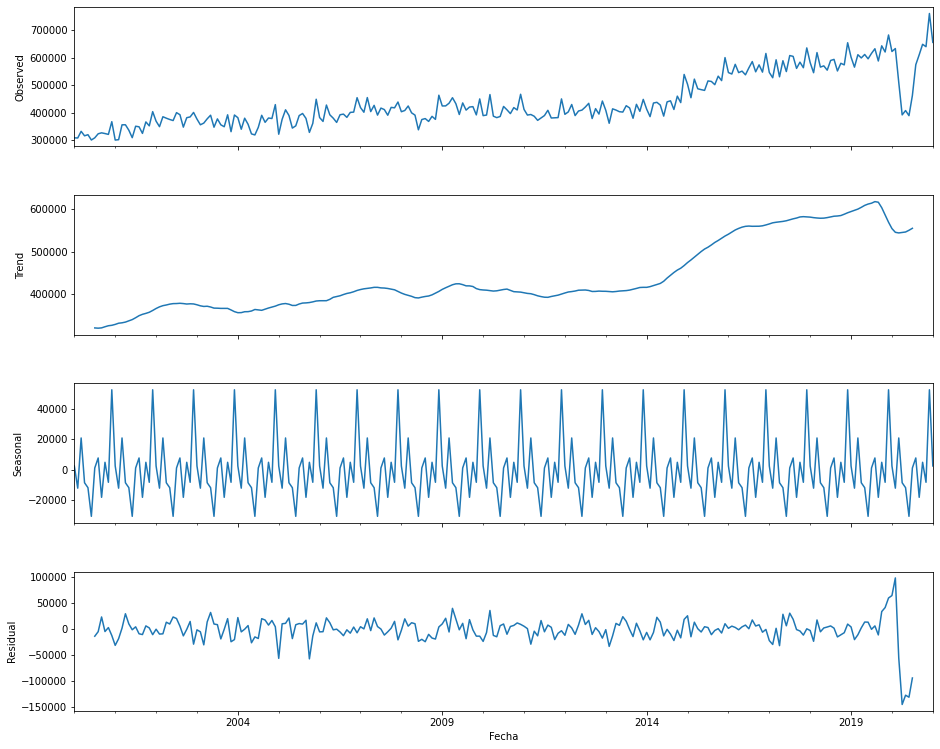

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['GasolinaSuper'], model='additive', freq=12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['GasolinaSuper'],order=(6,1,6),seasonal_order=(1, 0, 1, 12))
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
from pandas.tseries.offsets import DateOffset
new_dates=[df.index[-1]+DateOffset(months=x) for x in range(1,18)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred.head(20)

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,GasolinaAviacion,Kerosina,TurboJet,Bunker,Asfalto,PetCoke,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=pd.concat([df,df_pred])
df2['predictionsGasolinaSuper']=result.predict(start=250,end=320)
df2
#df2[['GasolinaSuper','predictionsGasolinaSuper']].plot(figsize=(20,10))
#plt.show()

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,GasolinaAviacion,Kerosina,TurboJet,Bunker,Asfalto,PetCoke,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total,predictionsGasolinaSuper
2000-01-31,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,194410.48,1426.0,64026.09,NaN,296766.99,48446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64,NaN
2000-02-29,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,174710.55,1458.0,62660.30,NaN,328116.44,50597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22,NaN
2000-03-31,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,189234.07,1503.0,61361.99,NaN,368589.63,27593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79,NaN
2000-04-30,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,174330.61,1561.0,61814.32,NaN,396300.47,53794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86,NaN
2000-05-31,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,191745.15,1642.0,54098.32,NaN,449368.92,60137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602815.358306
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624739.211234
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595250.232504
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596675.665223


TotalDiesel

<Figure size 432x288 with 0 Axes>

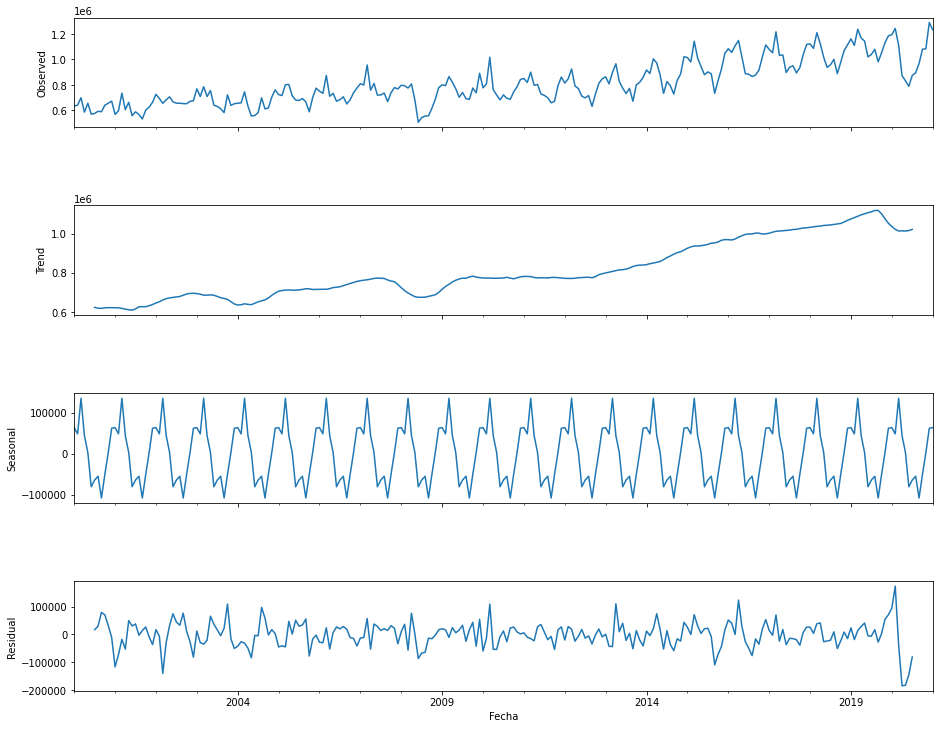

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['TotalDiesel'], model='additive', freq=12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['TotalDiesel'],order=(6,1,6),seasonal_order=(1, 0, 1, 12))
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


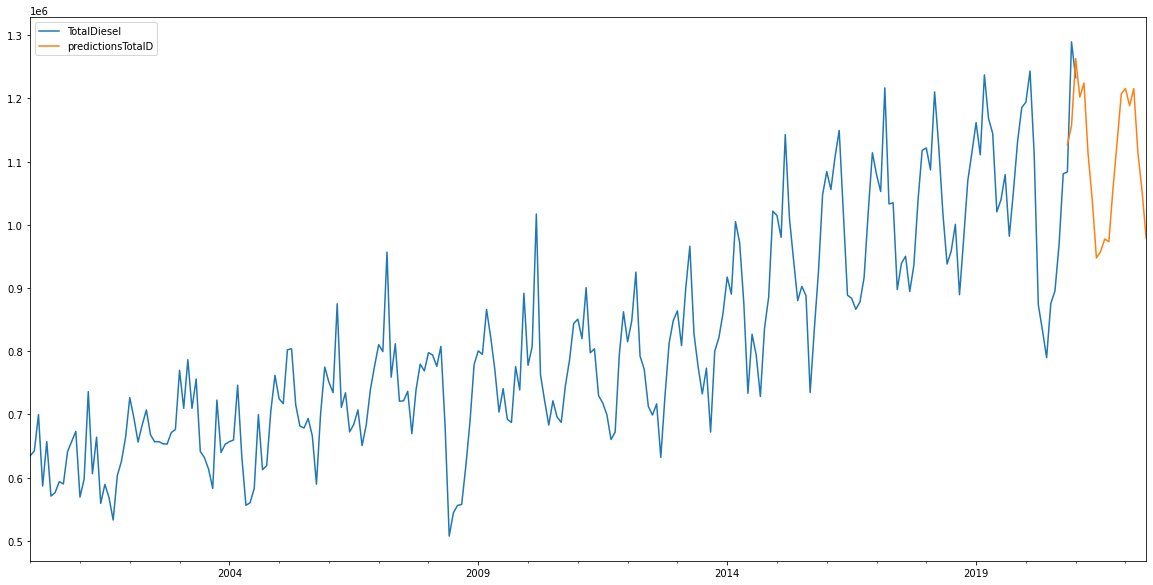

In [ ]:
df2['predictionsTotalD']=result.predict(start=250,end=320)
df2[['TotalDiesel','predictionsTotalD']].plot(figsize=(20,10))
plt.show()


## Gasolina regular

<Figure size 432x288 with 0 Axes>

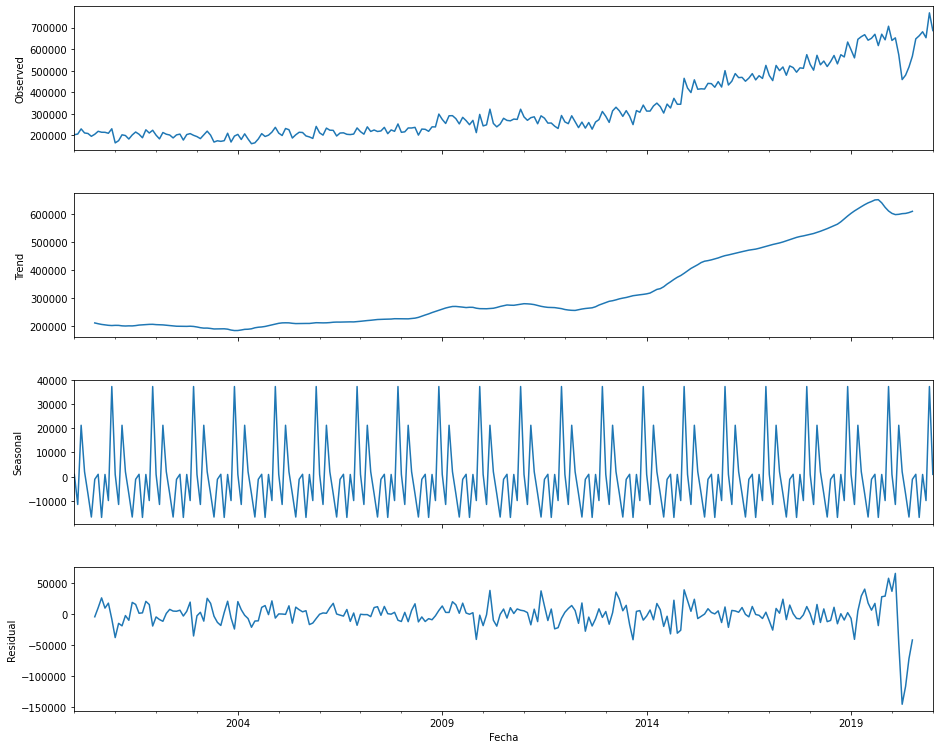

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['GasolinaRegular'],model = 'additive',freq = 12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,12)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['GasolinaRegular'],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
result=model.fit()

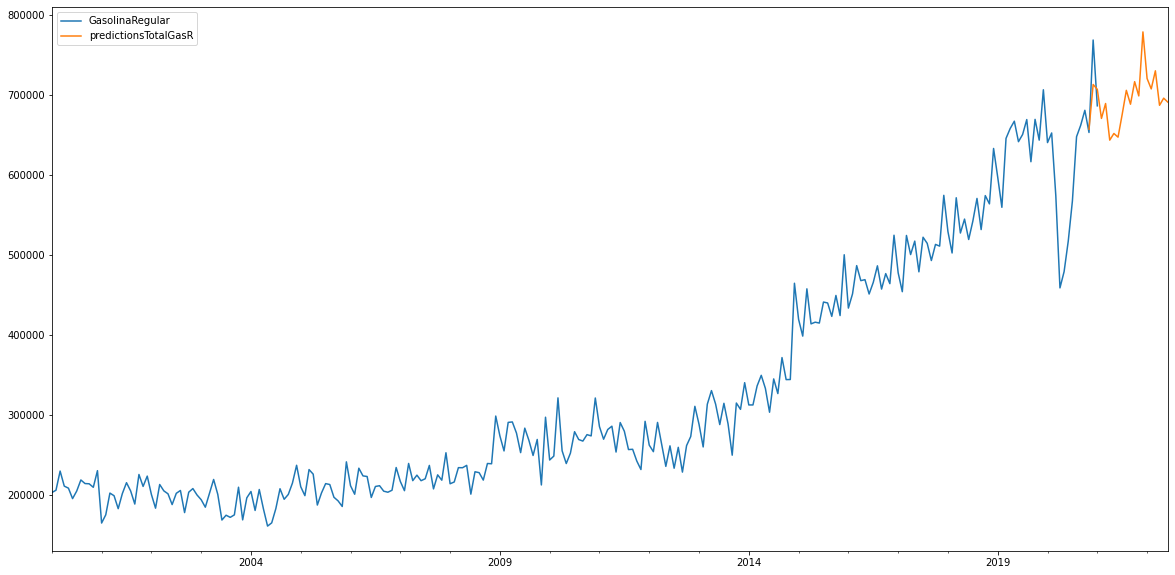

In [ ]:
df2['predictionsTotalGasR']=result.predict(start=250,end=320)
df2[['GasolinaRegular','predictionsTotalGasR']].plot(figsize=(20,10))
plt.show()


## Gasolina total

<Figure size 432x288 with 0 Axes>

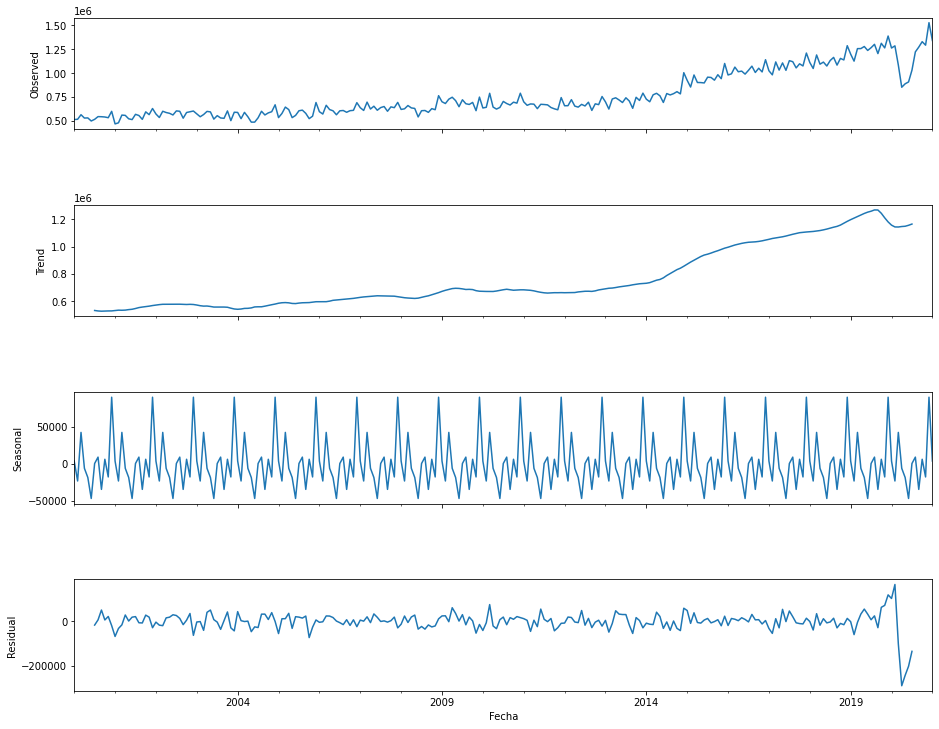

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['TotalGasolinas'], model='additive', freq=12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['TotalGasolinas'],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
result=model.fit()

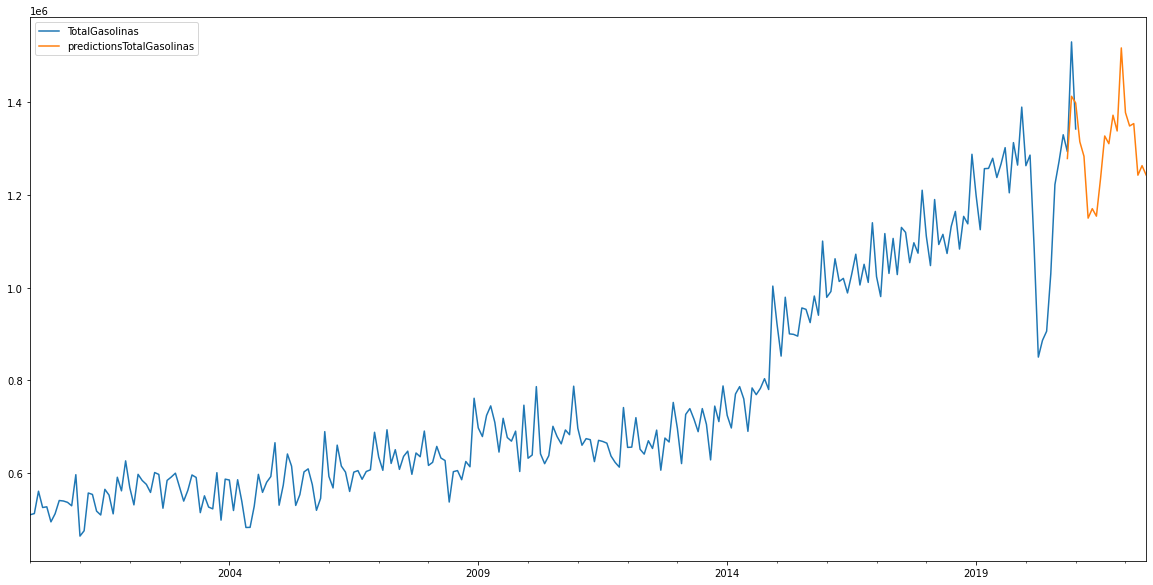

In [ ]:
df2['predictionsTotalGasolinas']=result.predict(start=250,end=320)
df2[['TotalGasolinas','predictionsTotalGasolinas']].plot(figsize=(20,10))
plt.show()

In [ ]:
df2

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,GasolinaAviacion,Kerosina,TurboJet,Bunker,Asfalto,PetCoke,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total,predictionsGasolinaSuper,predictionsTotalD,predictionsTotalGasR,predictionsTotalGasolinas
2000-01-31,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,194410.48,1426.0,64026.09,NaN,296766.99,48446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64,NaN,NaN,NaN,NaN
2000-02-29,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,174710.55,1458.0,62660.30,NaN,328116.44,50597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22,NaN,NaN,NaN,NaN
2000-03-31,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,189234.07,1503.0,61361.99,NaN,368589.63,27593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79,NaN,NaN,NaN,NaN
2000-04-30,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,174330.61,1561.0,61814.32,NaN,396300.47,53794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86,NaN,NaN,NaN,NaN
2000-05-31,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,191745.15,1642.0,54098.32,NaN,449368.92,60137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602815.358306,1.188282e+06,707092.183925,1.347856e+06
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624739.211234,1.215358e+06,729715.980636,1.353029e+06
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595250.232504,1.114009e+06,686604.645905,1.241901e+06
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596675.665223,1.053473e+06,695507.732720,1.262430e+06


In [74]:
from google.colab import files
df2.to_csv('predictions.csv')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>